In [1]:
# Importa as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importa os módulos customizados
import sys
sys.path.append('../src') # Adiciona o diretório src ao Python path
from data_loader import DataLoader
from preprocessor import DataPreprocessor

# Define o estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

--- 1. Carregamento e Exploração Inicial dos Dados ---
Dataset carregado de ../content/sample_data/diabetes.csv. Shape: (768, 9)

Informações sobre o Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Primeiras 5 linhas:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insul

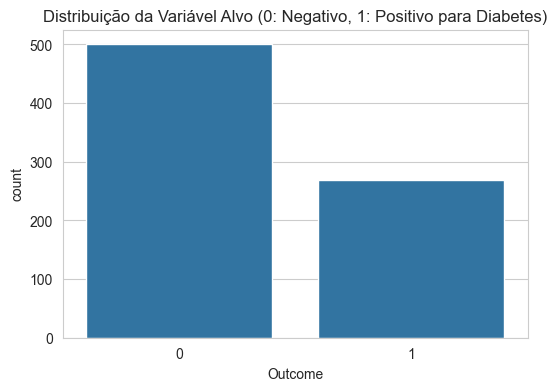

In [2]:
print("--- 1. Carregamento e Exploração Inicial dos Dados ---" )

filepath = r"../content/sample_data/diabetes.csv"

loader = DataLoader()
df = loader.load_from_csv(filepath, target_column='Outcome')
loader.get_info()

# Visualiza a distribuição da variável alvo
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribuição da Variável Alvo (0: Negativo, 1: Positivo para Diabetes)')
plt.show()


In [3]:
print("--- 2. Limpeza dos Dados: Tratando Zeros ---")

preprocessor = DataPreprocessor()

# Colunas onde o valor zero é considerado como um valor ausente
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df_cleaned = preprocessor.handle_zero_as_nan(df, columns_to_clean)

print("Valores nulos após a limpeza:")
print(df_cleaned.isnull().sum())

--- 2. Limpeza dos Dados: Tratando Zeros ---
Valores '0' substituídos por NaN nas colunas: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
Valores nulos após a limpeza:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


--- 3. Análise Exploratória dos Dados (Pós-Limpeza) ---


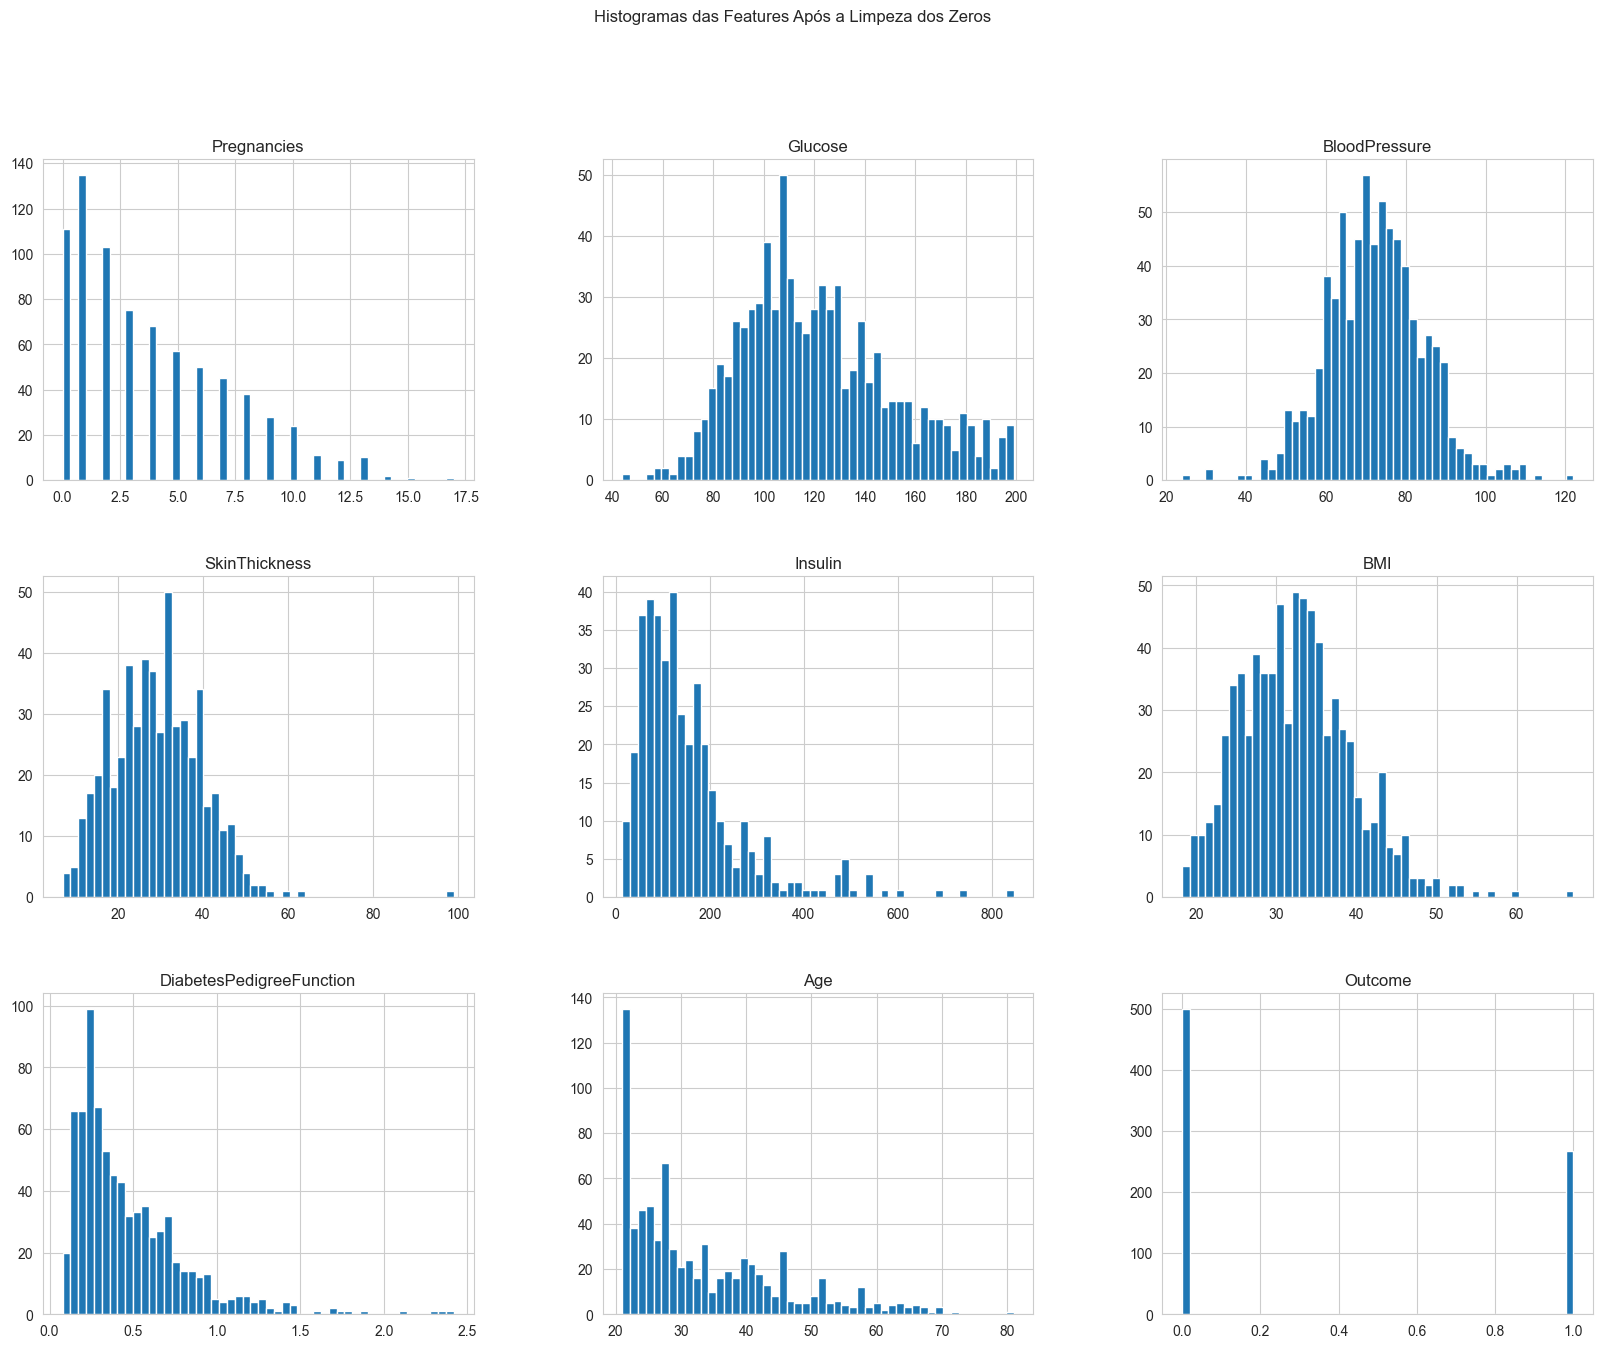

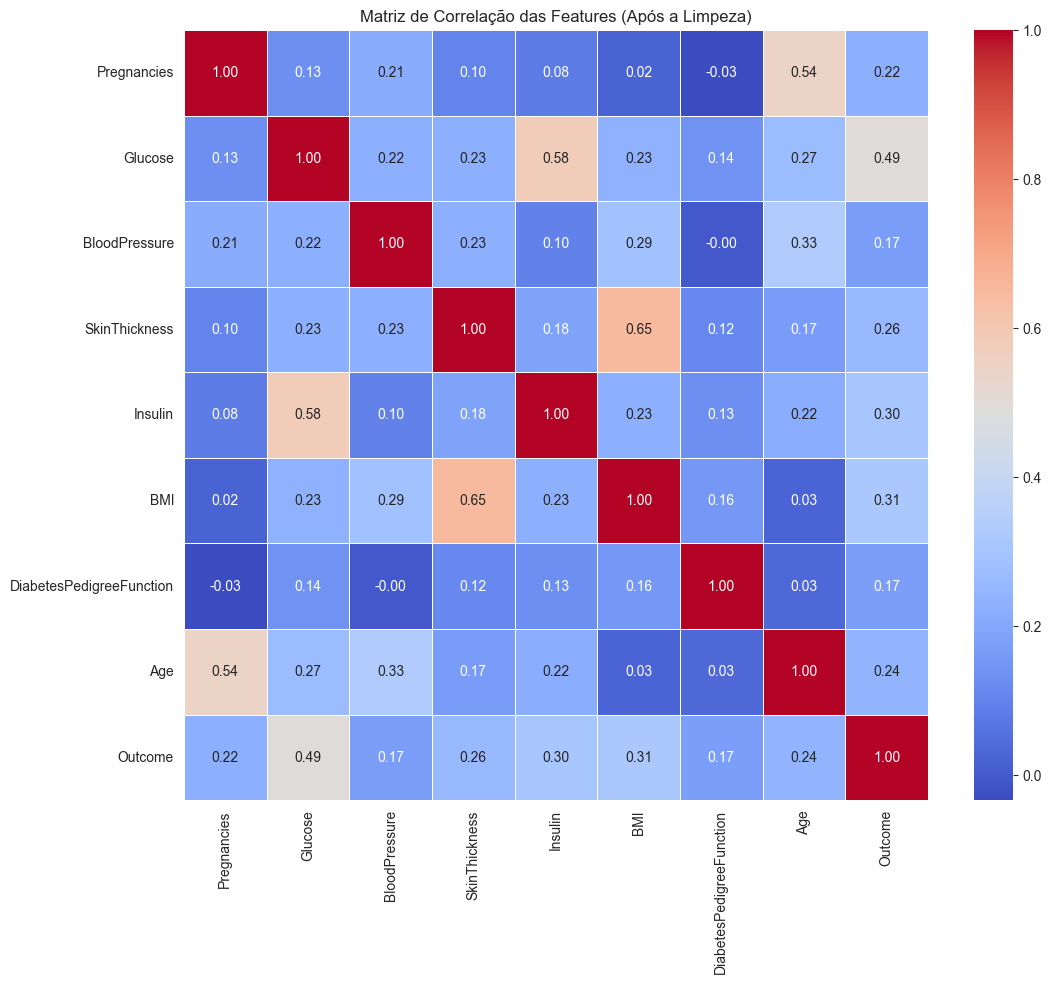

In [4]:
print("--- 3. Análise Exploratória dos Dados (Pós-Limpeza) ---")

# Histogramas dos dados limpos
df_cleaned.hist(bins=50, figsize=(20,15))
plt.suptitle('Histogramas das Features Após a Limpeza dos Zeros')
plt.show()

# Matriz de correlação com os dados limpos
plt.figure(figsize=(12, 10))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Features (Após a Limpeza)')
plt.show()